## The 6 $\times$ 6 matrix

In [1206]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=6, ncols=6, sharey=True, figsize=(21, 21), squeeze=False)

## The plot row function

In [1207]:
def plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, row, round_type, xticks_display):
    # For each column
    for col in range(6):
        plot_entry(file_names[col % 2], 
                   class_names[col // 2], 
                   class_names_display[col // 2], 
                   feature_names[col // 2], 
                   feature_names_display[col // 2], 
                   row, 
                   col,
                   round_type,
                   xticks_display if xticks_display is None else xticks_display[col // 2])

## The plot entry function

In [1208]:
def plot_entry(file_name, class_name, class_name_display, feature_name, feature_name_display, row, col, round_type, xticks_display):
    # Load the distribution file
    df = pd.read_csv(file_name, header=0)

    # Specify the name of the columns
    df.columns = ['yu', 'xj', 'xij', 'pij']
    
    print([class_name, df.loc[df['yu'] == class_name].shape[0]])

    df = df.loc[(df['yu'] == class_name) & (df['xj'] == feature_name)]

    # Get the feature values
    xijs = df['xij'].values

    # Get the probabilities
    pijs = df['pij'].values

    ax = axs[row, col]
    
    fontsize=30
    
    ax.set_title(class_name_display, fontsize=fontsize)
    
    # Plot the bar chart
    # If logistic regression
    if col % 2 == 0:
        ax.bar(range(len(xijs)), pijs, color='green')
    # If ALA
    else:
        ax.bar(range(len(xijs)), pijs, color='red')
    ax.legend(fontsize=fontsize)

    ax.set_xlabel(feature_name_display.strip(), fontsize=fontsize)
    
    # Get the length of xijs and the mid index
    n = len(xijs)
    mid = n // 2
    ax.set_xticks([0, n - 1])
    if round_type == -1:
        ax.set_xticklabels([xijs[0], xijs[n - 1]], fontsize=fontsize)
    elif round_type == 0:
        ax.set_xticklabels([int(xijs[0]), int(xijs[n - 1])], fontsize=fontsize)
    else:
        ax.set_xticklabels([round(xijs[0], round_type), round(xijs[n - 1], round_type)], fontsize=fontsize)
    
    if xticks_display is not None:
        ax.set_xticklabels(xticks_display, fontsize=fontsize)

    if col == 0:
        ax.set_ylabel('Importance', fontsize=fontsize)
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 1])
    ax.set_yticklabels([0, 1], fontsize=fontsize)

### Row 0: iris

In [1209]:
# The file names
file_names = (['result/ours/iris/prob_dist_file/iris.csv',
               'result/others/iris/prob_dist_file/LogisticRegression_multinomial_newton-cg/iris.csv'])

# The class names
class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

# The class names for display
class_names_display = ['Setosa', 'Virginica', 'Versicolor']

# The feature names
feature_names = [' Petal width', ' Petal width', ' Petal length']

# The feature names for display
feature_names_display = feature_names

# The xticks for display
xticks_display = None

# Plot row 0
plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 0, -1, xticks_display)

['Iris-setosa', 124]
['Iris-setosa', 124]
['Iris-virginica', 124]
['Iris-virginica', 124]
['Iris-versicolor', 124]
['Iris-versicolor', 124]


### Row 1: breast-cancer-wisconsin

In [1210]:
# The file names
file_names = (['result/ours/breast-cancer-wisconsin/prob_dist_file/breast-cancer-wisconsin.csv',
               'result/others/breast-cancer-wisconsin/prob_dist_file/LogisticRegression_multinomial_newton-cg/breast-cancer-wisconsin.csv'])

# The class names
class_names = [4, 4, 4]

# The class names for display
class_names_display = ['Malignant', 'Malignant', 'Malignant']

# The feature names
feature_names = [' Bare Nuclei', ' Uniformity of Cell Shape', ' Uniformity of Cell Size']

# The feature names for display
feature_names_display = ['Bare Nuclei', 'Cell Shape', 'Cell Size']

# The xticks for display
xticks_display = None

plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 1, 0, xticks_display)

[4, 90]
[4, 90]
[4, 90]
[4, 90]
[4, 90]
[4, 90]


### Row 2: drug_consumption

In [1211]:
# The file names
file_names = (['result/ours/drug_consumption/prob_dist_file/drug_consumption.csv',
               'result/others/drug_consumption/prob_dist_file/LogisticRegression_multinomial_newton-cg/drug_consumption.csv'])

# The class names
class_names = ['CL0', 'CL0', 'CL0']

# The class names for display
class_names_display = ['Never used', 'Never used', 'Never used']

# The feature names
feature_names = [' Gender', ' Impulsive', ' SS']

# The feature names for display
feature_names_display = ['Gender', 'Impulsiveness', 'Sensation']

# The xticks for display
xticks_display = [['M', 'F'], ['-2.6', '2.9'], ['-2.1', '1.9']]

plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 2, 0, xticks_display)

['CL0', 261]
['CL0', 261]
['CL0', 261]
['CL0', 261]
['CL0', 261]
['CL0', 261]


### Row 3: hepatitis

In [1212]:
# The file names
file_names = (['result/ours/hepatitis/prob_dist_file/hepatitis.csv',
               'result/others/hepatitis/prob_dist_file/LogisticRegression_multinomial_newton-cg/hepatitis.csv'])

# The class names
class_names = [1, 1, 1]

# The class names for display
class_names_display = ['Die', 'Die', 'Die']

# The feature names
feature_names = [' BILIRUBIN', ' PROTIME', ' ALBUMIN']

# The feature names for display
feature_names_display = ['Bilirubin', 'Protime', 'Albumin']

# The xticks for display
xticks_display = [['0.3', '4.8'], ['0', '100'], ['2.1', '5.0']]

plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 3, -1, xticks_display)

[1, 273]
[1, 273]
[1, 273]
[1, 273]
[1, 273]
[1, 273]


### Row 4: bank-additional

In [1213]:
# The file names
file_names = (['result/ours/bank-additional/prob_dist_file/bank-additional.csv',
               'result/others/bank-additional/prob_dist_file/LogisticRegression_multinomial_newton-cg/bank-additional.csv'])

# The class names
class_names = ['yes', 'yes', 'yes']

# The class names for display
class_names_display = ['Yes', 'Yes', 'Yes']

# The feature names
feature_names = [' poutcome_success', ' age', ' month_dec']

# The feature names for display
feature_names_display = ['Success', 'Age', 'December']

# The xticks for display
xticks_display = None

plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 4, 0, xticks_display)

['yes', 534]
['yes', 534]
['yes', 534]
['yes', 534]
['yes', 534]
['yes', 534]


### Row 5: SPECT

In [1214]:
# The file names
file_names = (['result/ours/SPECT/prob_dist_file/SPECT.csv',
               'result/others/SPECT/prob_dist_file/LogisticRegression_multinomial_newton-cg/SPECT.csv'])

# The class names
class_names = [1, 1, 1]

# The class names for display
class_names_display = ['1', '1', '1']

# The feature names
feature_names = [' F8', ' F17', ' F18']

# The feature names for display
feature_names_display = ['F8', 'F17', 'F18']

# The xticks for display
xticks_display = None

plot_row(file_names, class_names, class_names_display, feature_names, feature_names_display, 5, 0, xticks_display)

[1, 45]
[1, 45]
[1, 45]
[1, 45]
[1, 45]
[1, 45]


## Plot the 6 $\times$ 6 matrix

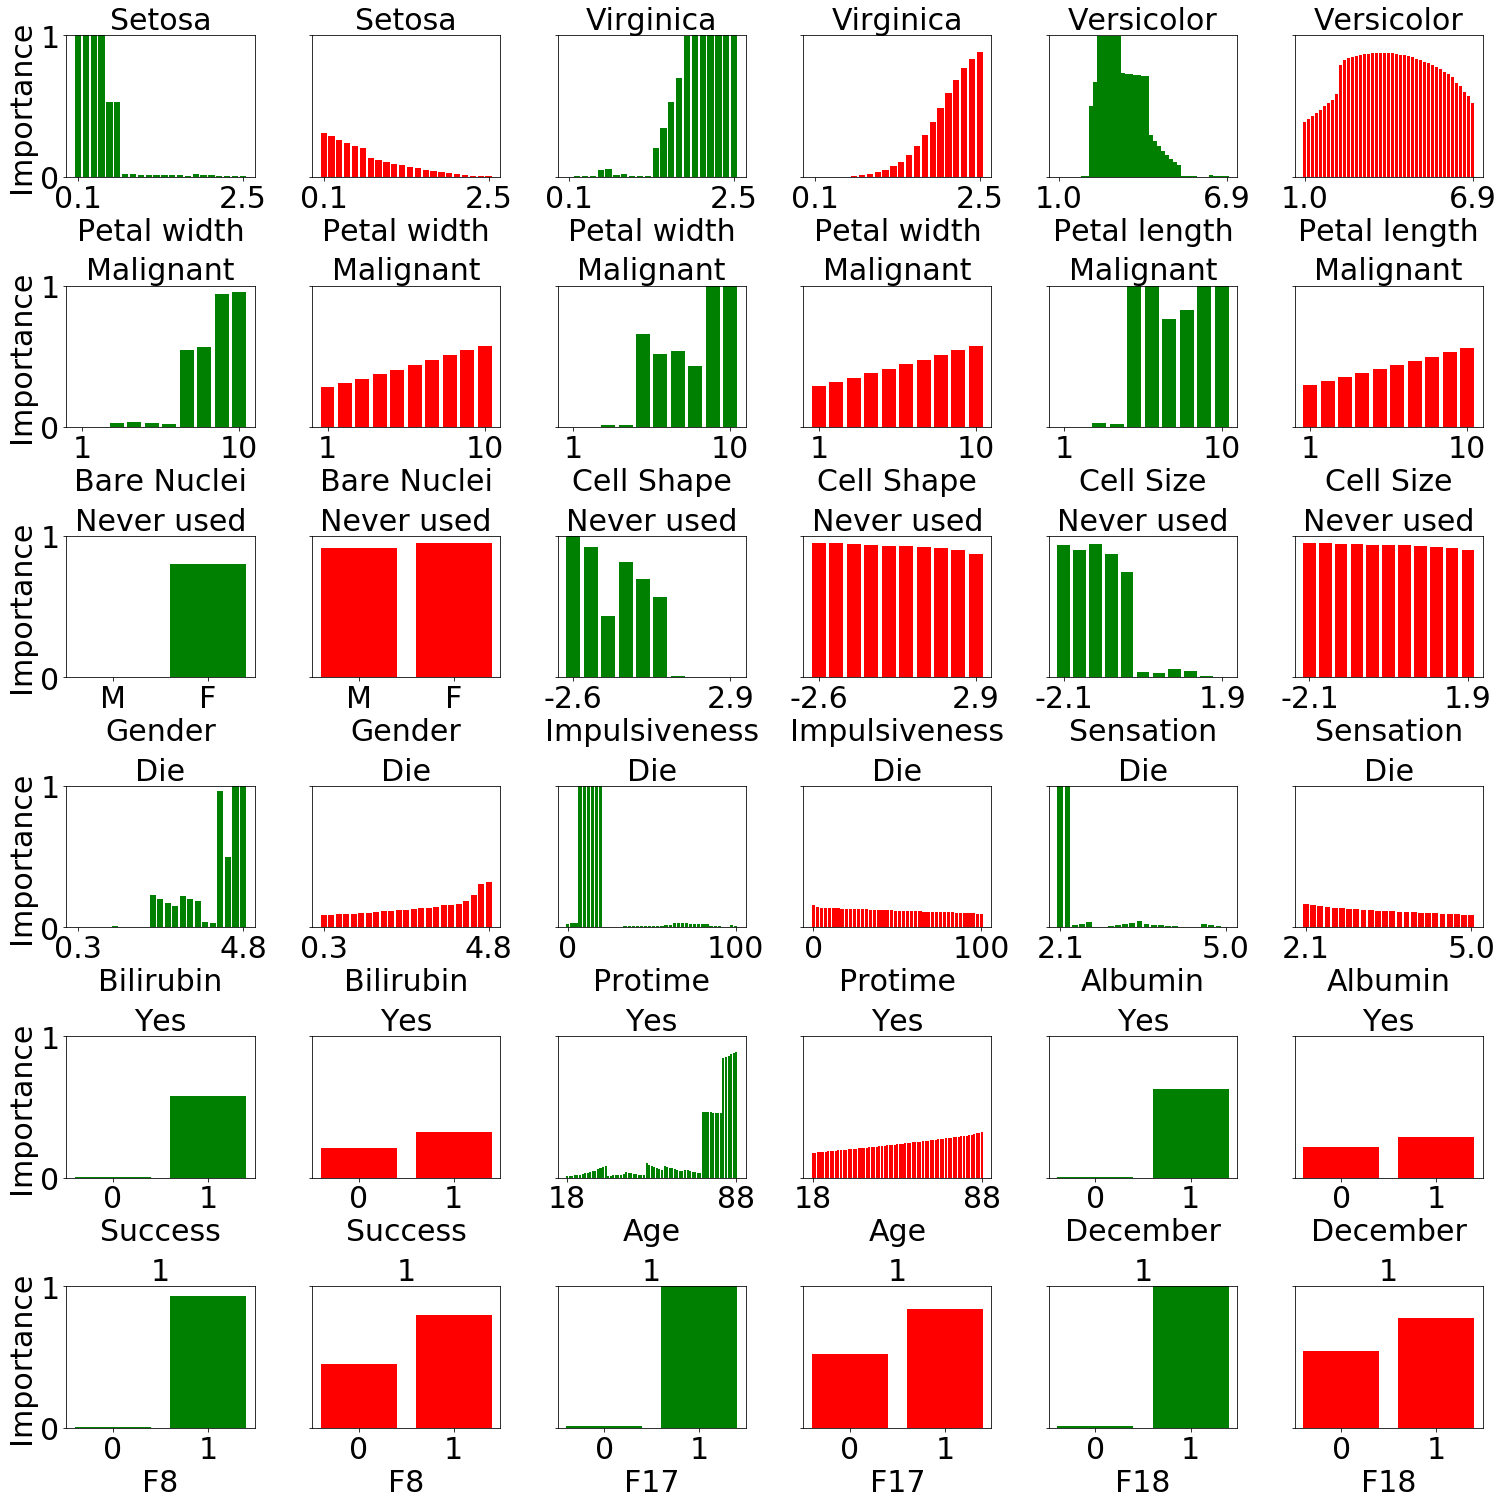

In [1215]:
fig.tight_layout()
plt.savefig('iris_distributions.pdf', dpi=300)
plt.show()